# Showcase

In [1]:
import skia
import contextlib
from IPython.display import display, Image

@contextlib.contextmanager
def draw_target():
    surface = skia.Surface(256, 256)
    with surface as canvas:
        yield canvas
    image = surface.makeImageSnapshot()
    display(Image(data=image.encodeToData()))

## Shapes

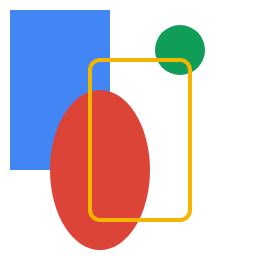

In [2]:
with draw_target() as canvas:
    canvas.drawColor(skia.ColorWHITE)
    
    paint = skia.Paint(
        Style=skia.Paint.kFill_Style,
        AntiAlias=True,
        StrokeWidth=4,
        Color=0xFF4285F4)
    
    rect = skia.Rect.MakeXYWH(10, 10, 100, 160)
    canvas.drawRect(rect, paint)
    
    oval = skia.RRect()
    oval.setOval(rect)
    oval.offset(40, 80)
    paint.setColor(0xFFDB4437)
    canvas.drawRRect(oval, paint)
    
    paint.setColor(0xFF0F9D58)
    canvas.drawCircle(180, 50, 25, paint)
    
    rect.offset(80, 50)
    paint.setColor(0xFFF4B400)
    paint.setStyle(skia.Paint.kStroke_Style)
    canvas.drawRoundRect(rect, 10, 10, paint)

## Bézier Curves

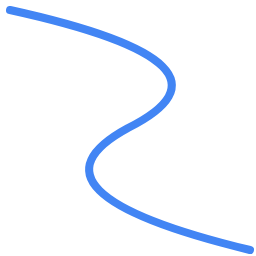

In [3]:
with draw_target() as canvas:
    canvas.drawColor(skia.ColorWHITE)
    
    paint = skia.Paint(
        Style=skia.Paint.kStroke_Style,
        StrokeWidth=8,
        Color=0xFF4285F4,
        AntiAlias=True,
        StrokeCap=skia.Paint.kRound_Cap)
    
    path = skia.Path()
    path.moveTo(10, 10)
    path.quadTo(256, 64, 128, 128)
    path.quadTo(10, 192, 250, 250)
    canvas.drawPath(path, paint)

## Translations and Rotations

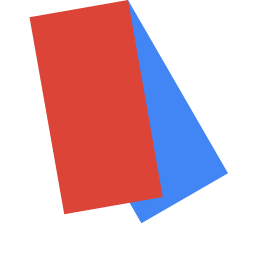

In [4]:
with draw_target() as canvas:
    canvas.translate(128, 0)
    canvas.rotate(60)
    rect = skia.Rect.MakeXYWH(0, 0, 200, 100)

    paint = skia.Paint(AntiAlias=True, Color=0xFF4285F4)
    canvas.drawRect(rect, paint)

    canvas.rotate(20)
    paint.setColor(0xFFDB4437)
    canvas.drawRect(rect, paint)

## Text rendering

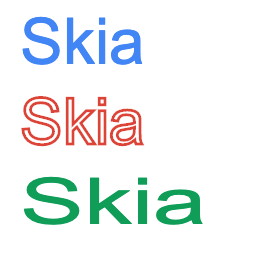

In [5]:
with draw_target() as canvas:
    typeface = skia.Typeface('Arial')

    font1 = skia.Font(typeface, 64.0, 1.0, 0.0)
    font2 = skia.Font(typeface, 64.0, 1.5, 0.0)
    font1.setEdging(skia.Font.Edging.kAntiAlias)
    font2.setEdging(skia.Font.Edging.kAntiAlias)

    blob1 = skia.TextBlob.MakeFromString('Skia', font1)
    blob2 = skia.TextBlob.MakeFromString('Skia', font2)

    paint1 = skia.Paint(
        AntiAlias=True,
        Color=skia.Color(0x42, 0x85, 0xF4))

    paint2 = skia.Paint(
        AntiAlias=True,
        Color=skia.Color(0xDB, 0x44, 0x37),
        Style=skia.Paint.kStroke_Style,
        StrokeWidth=3.0)

    paint3 = skia.Paint(
        AntiAlias=True,
        Color=skia.Color(0x0F, 0x9D, 0x58))

    canvas.clear(skia.ColorWHITE)
    canvas.drawTextBlob(blob1, 20.0, 64.0, paint1)
    canvas.drawTextBlob(blob1, 20.0, 144.0, paint2)
    canvas.drawTextBlob(blob2, 20.0, 224.0, paint3)

## Discrete Path Effects

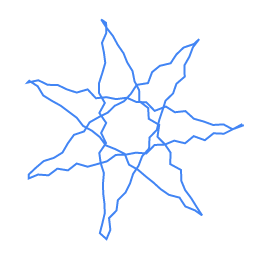

In [6]:
def star():
    from math import cos, sin
    R = 115.2
    C = 128.0
    path = skia.Path()
    path.moveTo(C + R, C)
    for i in range(1, 8):
        a = 2.6927937 * i
        path.lineTo(C + R * cos(a), C + R * sin(a))
    return path
        
        
with draw_target() as canvas:
    paint = skia.Paint(
        PathEffect=skia.DiscretePathEffect.Make(10.0, 4.0),
        Style=skia.Paint.kStroke_Style,
        StrokeWidth=2.0,
        AntiAlias=True,
        Color=0xFF4285F4)
    canvas.clear(skia.ColorWHITE)
    path = star()
    canvas.drawPath(path, paint)

## Composed Path Effects

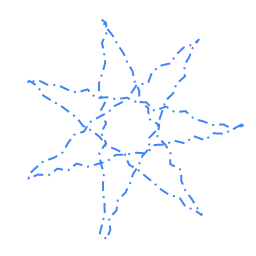

In [7]:
with draw_target() as canvas:
    paint = skia.Paint(
        PathEffect=skia.PathEffect.MakeCompose(
            skia.DashPathEffect.Make([10.0, 5.0, 2.0, 5.0], 0.0),
            skia.DiscretePathEffect.Make(10.0, 4.0)),
        Style=skia.Paint.kStroke_Style,
        StrokeWidth=2.0,
        AntiAlias=True,
        Color=0xFF4285F4)
    canvas.clear(skia.ColorWHITE)
    path = star()
    canvas.drawPath(path, paint)

## Sum Path Effects

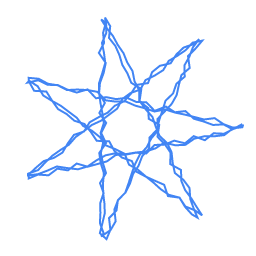

In [8]:
with draw_target() as canvas:
    paint = skia.Paint(
        PathEffect=skia.PathEffect.MakeSum(
            skia.DiscretePathEffect.Make(10.0, 4.0),
            skia.DiscretePathEffect.Make(10.0, 4.0, 1245)),
        Style=skia.Paint.kStroke_Style,
        StrokeWidth=2.0,
        AntiAlias=True,
        Color=0xFF4285F4)
    canvas.clear(skia.ColorWHITE)
    path = star()
    canvas.drawPath(path, paint)

## Shaders

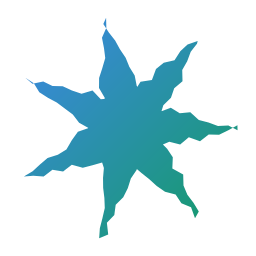

In [9]:
with draw_target() as canvas:
    paint = skia.Paint(
        PathEffect=skia.DiscretePathEffect.Make(10.0, 4.0),
        Shader=skia.GradientShader.MakeLinear(
            [(0, 0), (256, 256)],
            [skia.Color(66, 133, 244), skia.Color(15, 157, 88)]),
        AntiAlias=True)
    canvas.clear(skia.ColorWHITE)
    path = star()
    canvas.drawPath(path, paint)